#### 📘  **Overview: Time Series**

#### 🧠 What You’ll Learn:

* Understand the structure of time series data
* Handle **datetime** formats in Python
* Engineer useful time-based features
* Create **lags** and **rolling windows**
* Build **forecasts** using historical patterns

---
#### 1. **Assembling Your Time Series Data**

* Learn what makes time series data unique
* Parse **datetime columns** into usable formats
* Set **date indexes** for proper analysis

📌 Example:

```python
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
```

You’ll also learn how to **resample** data to different time intervals (e.g., daily → weekly).

---
#### 2. **Charting Time Series**

* Visualize trends and seasonality using line plots
* Use `seaborn` and `matplotlib` to explore patterns

📌 Example:

```python
df['value'].plot(figsize=(12, 6))
```

You'll see how visualizations can reveal:

* **Trends** (long-term movement)
* **Seasonality** (repeating cycles)
* **Outliers**
---

#### 3. **Trends, Seasonality, and Noise**

* Decompose time series into:

  * **Trend**: long-term increase/decrease
  * **Seasonality**: regular cycles
  * **Noise**: randomness

📌 Tool: `statsmodels.tsa.seasonal_decompose()`

```python
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['value'], model='additive')
result.plot()
```
* This helps you **understand** the structure of your data before modeling. 
---

#### 4. **Moving Averages**

* Smooth out short-term fluctuations
* Use **rolling windows** to calculate moving averages

📌 Example:

```python
df['rolling_mean'] = df['value'].rolling(window=7).mean()
```

This is useful for highlighting **long-term trends**.

---

#### 5. **Time-Based Features**

* Create new features like:

  * Day of week
  * Month
  * Holiday/weekend indicators
  * Lag features (past values)

📌 Example:

```python
df['day_of_week'] = df.index.dayofweek
df['lag_1'] = df['value'].shift(1)
```

These features help ML models learn patterns **based on time**.

---

#### 6. **Lag Features**

* Use **previous values** as input features for prediction
* Essential for models like:

  * Random Forest
  * XGBoost
  * Linear regression

📌 Example:

```python
df['lag_7'] = df['value'].shift(7)  # Value 7 days ago
```

Lag features turn time series problems into **supervised learning** tasks.

---

#### 7. **Rolling Window Features**

* Add statistical features over time windows:

  * Mean
  * Max/min
  * Standard deviation

📌 Example:

```python
df['rolling_std_7'] = df['value'].rolling(7).std()
```

Useful for capturing **recent volatility or change** in behavior.

---

#### 8. **Forecasting**

* Use your lagged/rolling features in a supervised model
* Train-test split must **respect time** (no random shuffling!)
* Use models like **XGBoost**, **RandomForest**, or **LightGBM**

📌 Example:

```python
model.fit(X_train, y_train)
predictions = model.predict(X_valid)
```

* Evaluate using metrics like **MAE** or **RMSE**
---

#### ✅ **Skills You'll Gain**

* Handle and analyze time-based data
* Create predictive features from time series
* Visualize time series trends and seasonality
* Forecast future values using machine learning
* Avoid common mistakes in time series modeling
---

#### **Would you like:**

* A working code template for forecasting?
* A practice dataset to try these skills?
* A cheat sheet for time series feature engineering?


In [3]:
import pandas as pd
from datetime import datetime, timedelta
import random

# Generate a list of 5 dates starting from today
start_date = datetime.today().date()
dates = [start_date + timedelta(days=i) for i in range(5)]

# Sample vegetables and prices
vegetables = ["Tomato", "Potato", "Carrot", "Onion", "Spinach"]
prices = [round(random.uniform(1.0, 3.0), 2) for _ in range(5)]

# Assign vegetables in a repeating pattern
veg_list = [vegetables[i % len(vegetables)] for i in range(5)]

In [4]:
# Create the DataFrame
df = pd.DataFrame({"Date": dates, "Vegetable": veg_list, "Price": prices})
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Mon"] = df["Date"].dt.month
df["Yr"] = df["Date"].dt.year
df["Veg_Rank"] = pd.factorize(df["Vegetable"])[0]
df["Price_Cat"] = pd.qcut(
    df["Price"], q=4, labels=["Low", "Medium", "High", "Very High"]
)
df["Day_Qtr"] = pd.qcut(df["Day"], q=3, labels=["Early", "Mid", "Late"])
df.set_index("Date", inplace=True)
# df.reset_index(drop=True, inplace=True)
# df.index = range(1, len(df) + 1)
df["day_of_week"] = df.index.dayofweek
df["Prev_Day"] = df["Day"].shift(1).fillna(df["Day"])
df["Prev_Day_Price"] = df["Price"] - 0.2

df.columns

Index(['Vegetable', 'Price', 'Day', 'Mon', 'Yr', 'Veg_Rank', 'Price_Cat',
       'Day_Qtr', 'day_of_week', 'Prev_Day', 'Prev_Day_Price'],
      dtype='object')

In [5]:
df["rolling_mean"] = df["Mon"].rolling(window=7).mean()
df.columns

Index(['Vegetable', 'Price', 'Day', 'Mon', 'Yr', 'Veg_Rank', 'Price_Cat',
       'Day_Qtr', 'day_of_week', 'Prev_Day', 'Prev_Day_Price', 'rolling_mean'],
      dtype='object')

#### Seasonal Trend

In [67]:
!uv add statsmodels

Resolved 193 packages in 11ms
Audited 188 packages in 0.19ms


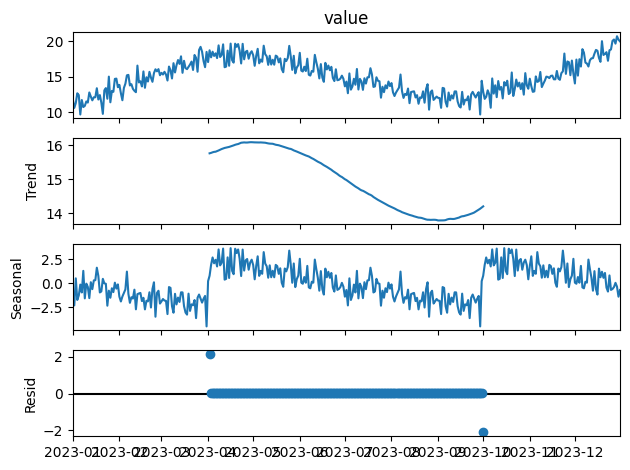

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a datetime index (daily data for 2 years)
dates = pd.date_range(start="2023-01-01", periods=365)

# Create components:
np.random.seed(0)
trend = np.linspace(10, 20, 365)  # slowly increasing trend
seasonality = 5 * np.sin(2 * np.pi * dates.dayofyear / 365)  # yearly seasonality
noise = np.random.normal(0, 1, 365)  # random noise

# Combine to form the time series
values = trend + seasonality + noise

# Build DataFrame
df = pd.DataFrame({"value": values}, index=dates)

# Decompose the time series (additive model)
result = seasonal_decompose(df["value"], model="additive", period=int(365 / 2))

# Plot the decomposition
result.plot()
plt.show()

In [81]:
dates_d = pd.date_range(start="2013-02-10", periods=12)
dates_d
dates_d = pd.date_range(start="2013-02-10", periods=3, end="2014-02-02")
dates_d = pd.to_datetime(dates_d)

dates_d

DatetimeIndex(['2013-02-10 00:00:00', '2013-08-07 12:00:00',
               '2014-02-02 00:00:00'],
              dtype='datetime64[ns]', freq=None)

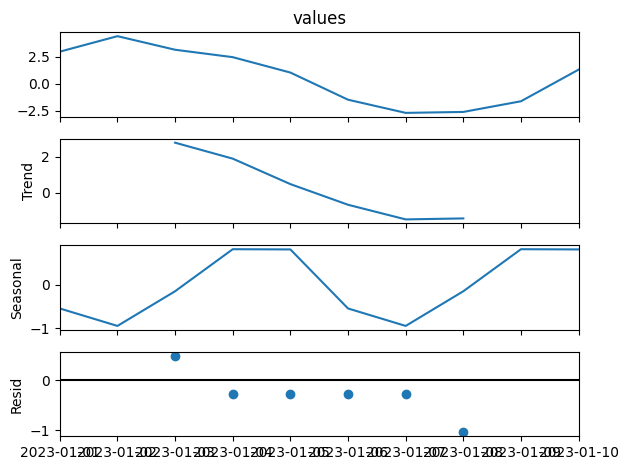

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

trend = np.linspace(0, 2, 10)
trend

dates = pd.date_range(start="2023-01-01", periods=10)

seasonality = 5 * np.sin(2 * np.pi * dates.dayofyear / 10)
seasonality

noise = np.random.normal(0, 1, 10)
noise

values = trend + seasonality + noise
values

df = pd.DataFrame({"values": values}, index=dates)
df

result = seasonal_decompose(df["values"], model="additive", period=5)
result.plot()
plt.show()